In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
s = None
with open("Public Leaderboard - Santa's Uncertain Bags _ Kaggle.htm", encoding="utf-8") as f:
    s = f.read()

In [5]:
from bs4 import BeautifulSoup

In [8]:
BeautifulSoup?

In [6]:
bs = BeautifulSoup(s, )

d:\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [21]:
tr_list = []
for tr in bs.find_all('tr'):
    try:
        if tr['id'] is None: continue
    except:
        continue
    if 'team' in tr['id']:
        tr_list.append(tr)

In [38]:
numbers, scores, entrieses = [], [], []
for tr in tr_list:
    try:
        numbers.append(int( tr.td.text))
        entrieses.append(int( tr.find_all('td')[-2].text))
        scores.append(float( tr.find('abbr').text))
    except:
        print('!', end=' ')

d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


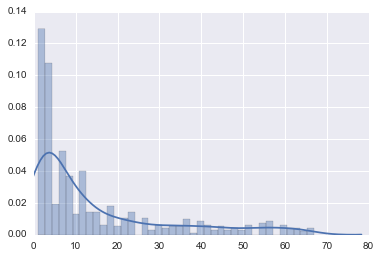

In [41]:
sns.plt.xlim(0, 80)
sns.distplot(entrieses, bins=40, )

d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


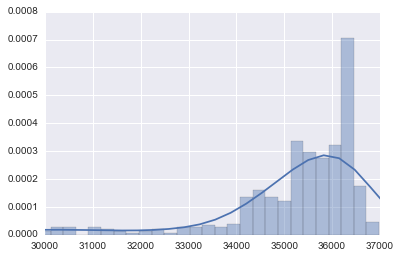

In [45]:
plt.xlim(30000, 37000)
sns.distplot(scores, bins=140)

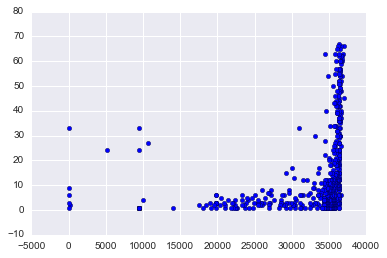

In [46]:

plt.scatter(scores, entrieses)

In [47]:
df = pd.DataFrame({"score":scores, 'entries':entrieses}, index=numbers)

In [49]:
cut_df = df[df.score > 35000]

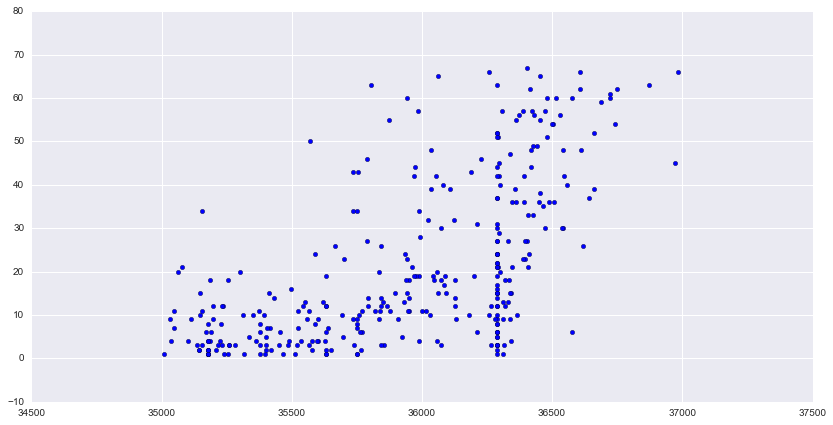

In [51]:
plt.figure(figsize=(14,7))
plt.scatter(cut_df.score, cut_df.entries)